# Data Sampling

In [2]:
import json
import random
import requests

In [2]:
## NO EJECUTAR PORQUE SE ACTUALIZA .JSON Y FALLAN LOS TEST
def get_dataset(ticker):
    t_query = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&outputsize=full&apikey=YEJWMRYCM11RUFUZ&data_type=json'
    response = requests.get(t_query)
    json_data_downloaded = response.json()
    return json_data_downloaded

ticker='IBM'

with open(f"TIME_SERIES_DAILY_ADJUSTED.IBM.json", 'w') as outfile:
    outfile.write(json.dumps(get_dataset(ticker), indent=4))

# Data Processing with `pandas`

In [3]:
with open("TIME_SERIES_DAILY_ADJUSTED.IBM.json") as json_file:
    data = json.load(json_file)["Time Series (Daily)"]

print(random.choice(list(data.items())))

('2012-07-23', {'1. open': '189.78', '2. high': '191.3', '3. low': '188.2', '4. close': '190.83', '5. adjusted close': '137.748612337', '6. volume': '3904500', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'})


## Adjust index and values types

In [4]:
import numpy as np
import pandas as pd

data_field2name_type = {
    "1. open":                  ("open",     "float"),
    "2. high":                  ("high",     "float"),
    "3. low":                   ("low",      "float"),
    "4. close":                 ("close",    "float"),
    "5. adjusted close":        ("aclose",   "float"),
    "6. volume":                ("volume",   np.int32),
    "7. dividend amount":       ("dividend", "float"),
    "8. split coefficient":     ("splitc",   "float"),
}

df = pd.DataFrame.from_dict(data, orient = 'index', dtype=float)

df = df.rename(columns={ key: name_type[0] for key, name_type in data_field2name_type.items() })

df = df.astype(dtype={ name_type[0]: name_type[1] for key, name_type in data_field2name_type.items() })

df.index = df.index.astype("datetime64[ns]")

print(df.head())
print(df.index)
print(df.columns)
print(df.dtypes)

              open     high     low   close      aclose   volume  dividend  \
2021-05-11  144.99  145.190  142.90  144.22  144.220000  7121499      0.00   
2021-05-10  145.80  148.380  145.80  146.17  146.170000  6983377      0.00   
2021-05-07  145.92  146.140  144.57  145.46  145.460000  7003467      1.64   
2021-05-06  145.26  148.515  145.18  148.42  146.765283  7503487      0.00   
2021-05-05  145.94  145.940  144.97  145.22  143.600960  3622800      0.00   

            splitc  
2021-05-11     1.0  
2021-05-10     1.0  
2021-05-07     1.0  
2021-05-06     1.0  
2021-05-05     1.0  
DatetimeIndex(['2021-05-11', '2021-05-10', '2021-05-07', '2021-05-06',
               '2021-05-05', '2021-05-04', '2021-05-03', '2021-04-30',
               '2021-04-29', '2021-04-28',
               ...
               '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09',
               '1999-11-08', '1999-11-05', '1999-11-04', '1999-11-03',
               '1999-11-02', '1999-11-01'],
              d

## Sort values by index

In [5]:
df = df.sort_index(ascending=True)

print(df.head)

<bound method NDFrame.head of               open     high     low   close      aclose    volume  dividend  \
1999-11-01   98.50   98.810   96.37   96.75   60.047458   9551800      0.00   
1999-11-02   96.75   96.810   93.69   94.81   58.843405  11105400      0.00   
1999-11-03   95.87   95.940   93.50   94.37   58.570321  10369100      0.00   
1999-11-04   94.44   94.440   90.00   91.56   56.826307  16697600      0.00   
1999-11-05   92.75   92.940   90.19   90.25   56.013262  13737600      0.00   
...            ...      ...     ...     ...         ...       ...       ...   
2021-05-05  145.94  145.940  144.97  145.22  143.600960   3622800      0.00   
2021-05-06  145.26  148.515  145.18  148.42  146.765283   7503487      0.00   
2021-05-07  145.92  146.140  144.57  145.46  145.460000   7003467      1.64   
2021-05-10  145.80  148.380  145.80  146.17  146.170000   6983377      0.00   
2021-05-11  144.99  145.190  142.90  144.22  144.220000   7121499      0.00   

            splitc  


## Plot adjusted daily price

1999-11-01     96.75
1999-11-02     94.81
1999-11-03     94.37
1999-11-04     91.56
1999-11-05     90.25
               ...  
2021-05-05    145.22
2021-05-06    148.42
2021-05-07    145.46
2021-05-10    146.17
2021-05-11    144.22
Name: close, Length: 5416, dtype: float64
Business days: 5416


<AxesSubplot:>

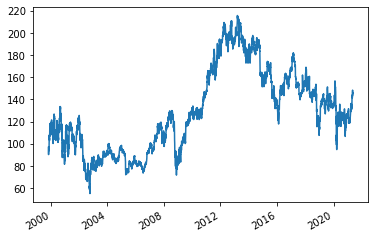

In [6]:
s = df['close']

print(s)
print(f"Business days: {s.count()}")
s.plot()

In [7]:
s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.prices.unfiltered.csv')

## Plot adjusted daily price by date

2021-01-04    123.94
2021-01-05    126.14
2021-01-06    129.29
2021-01-07    128.99
2021-01-08    128.53
2021-01-11    128.58
2021-01-12    129.21
2021-01-13    126.92
2021-01-14    128.97
2021-01-15    128.39
2021-01-19    129.02
2021-01-20    130.08
2021-01-21    131.65
2021-01-22    118.61
2021-01-25    118.58
2021-01-26    122.49
2021-01-27    122.47
2021-01-28    120.08
2021-01-29    119.11
2021-02-01    120.54
2021-02-02    119.44
2021-02-03    119.12
2021-02-04    121.02
2021-02-05    121.79
2021-02-08    123.61
2021-02-09    122.10
2021-02-10    122.24
2021-02-11    120.91
2021-02-12    120.80
2021-02-16    120.07
2021-02-17    119.97
2021-02-18    120.73
2021-02-19    118.99
2021-02-22    120.86
2021-02-23    120.71
2021-02-24    123.21
2021-02-25    122.47
2021-02-26    118.93
Name: close, dtype: float64
Business days: 38


<AxesSubplot:>

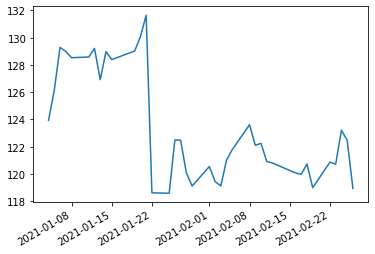

In [12]:
# import matplotlib.pyplot as plt
# plt.plot(df['aclose'].to_numpy())
# plt.show()

import datetime

s = df['close']

s = s.loc[datetime.date(year=2021,month=1,day=1):datetime.date(year=2021,month=2,day=28)]

print(s)
print(f"Business days: {s.count()}")
s.plot()

In [9]:
#s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.prices.filtered.csv')

## csv unfiltered

In [ ]:
s = df
#s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.unfiltered.csv')#no ejecutar si ya obtenido

## csv volume filtered

In [ ]:
s = df['volume']
s = s.loc[datetime.date(year=2021,month=1,day=1):datetime.date(year=2021,month=2,day=28)]
#s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.volume.filtered.csv')#no ejecutar si ya obtenido

## csv yearly dividend

In [22]:
s = df['dividend'].groupby(pd.Grouper(level=0, freq='1YS')).sum()
s.index = s.index.strftime('%Y')
s = s.loc["2010":"2021"]
#s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.yearly_dividends.filtered.csv')

2010    2.50
2011    2.90
2012    3.30
2013    3.70
2014    4.25
2015    5.00
2016    5.50
2017    5.90
2018    6.21
2019    6.43
2020    6.51
2021    3.27
Name: dividend, dtype: float64

## csv yearly dividen per quarter

In [7]:
s = df['dividend'].resample('QS').sum()
s = s.loc[str(1999):str(2007)]
s.to_csv('TIME_SERIES_DAILY_ADJUSTED.IBM.yearly_dividends_quarter.filtered.csv')